In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("../output/grids/a3d_grids.nc")
var='swe'
ds

<xarray.Dataset>
Dimensions:                (easting: 6, northing: 4, time: 2231)
Coordinates:
  * time                   (time) datetime64[ns] 1980-01-01T01:00:00 ... 1980-04-02T23:00:00
  * northing               (northing) float32 -122000.0 -92000.0 ... -32000.0
  * easting                (easting) float32 -1542000.0 ... -1392000.0
Data variables:
    dw                     (time, northing, easting) float32 ...
    ET                     (time, northing, easting) float32 ...
    snd                    (time, northing, easting) float32 ...
    rlds                   (time, northing, easting) float32 ...
    rsds                   (time, northing, easting) float32 ...
    MS_HNW                 (time, northing, easting) float32 ...
    MS_SNOWPACK_RUNOFF     (time, northing, easting) float32 ...
    MS_WIND                (time, northing, easting) float32 ...
    pr                     (time, northing, easting) float32 ...
    hur                    (time, northing, easting) float32 ...
    snow_density           (time, northing, easting) float32 ...
    SFC_SUBL               (time, northing, easting) float32 ...
    SURF_ALB               (time, northing, easting) float32 ...
    swe                    (time, northing, easting) float32 ...
    ta                     (time, northing, easting) float32 ...
    TOP_ALB                (time, northing, easting) float32 ...
    TSG                    (time, northing, easting) float32 ...
    ts                     (time, northing, easting) float32 ...
    ws                     (time, northing, easting) float32 ...
    VW_DRIFT               (time, northing, easting) float32 ...
    WINDEROSIONDEPOSITION  (time, northing, easting) float32 ...
Attributes:
    date_created:              2020-09-21
    creator_name:              erke2265
    source:                    MeteoIO-2.81
    history:                   2020-09-21T20:06:17Z, erke2265@shas0125.rc.int...
    keywords_vocabulary:       AGU Index Terms
    keywords:                  Cryosphere, Mass Balance, Energy Balance, Atmo...
    title:                     Gridded data for various parameters and timesteps
    institution:               colorado.edu
    product_version:           1.0
    Conventions:               CF-1.6,ACDD-1.3
    standard_name_vocabulary:  CF-1.6
    cdm_data_type:             Grid
    geospatial_bounds_crs:     EPSG:3031
    geospatial_bounds:         Polygon ((-1542000.0000000000 -122000.00000000...

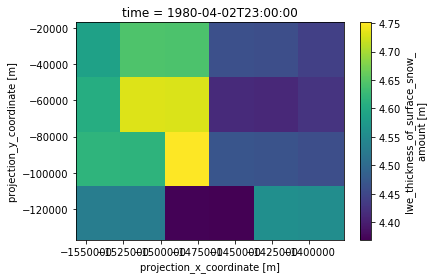

In [3]:
ds[var][-1,:,:].plot()

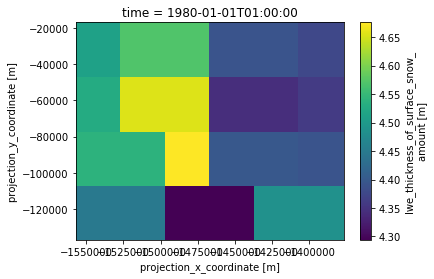

In [4]:
ds[var][0,:,:].plot()

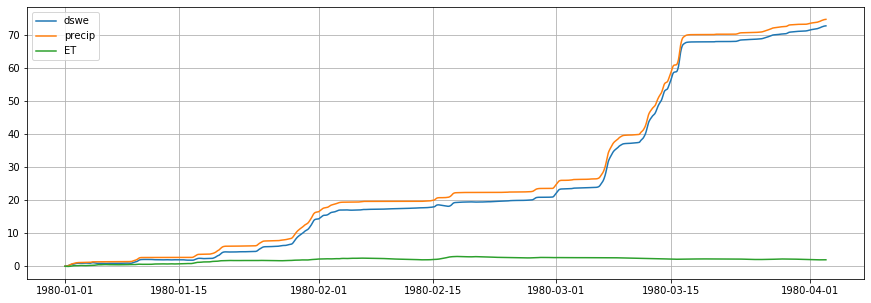

In [5]:
dm = ds['swe'] - ds['swe'].isel(time=0)
mean_dswe = dm.mean(dim='easting').mean(dim='northing') * 1000

mean_pr_cumsum = ds['pr'].mean(dim='easting').mean(dim='northing').cumsum()
mean_ET_cumsum = ds['ET'].mean(dim='easting').mean(dim='northing').cumsum()

plt.figure(figsize=(15, 5))
plt.plot(ds['time'], mean_dswe, label='dswe')
plt.plot(ds['time'],mean_pr_cumsum, label='precip')
plt.plot(ds['time'],mean_ET_cumsum, label='ET')
# plt.plot(ds['time'], mean_dswe + mean_ET_cumsum, label='dswe + ET')
plt.grid()
plt.legend()

# Compare delta SWE to sum of mass balance components. Units of mm water equivalent

Mean Delta SWE (mm) = 72.670715


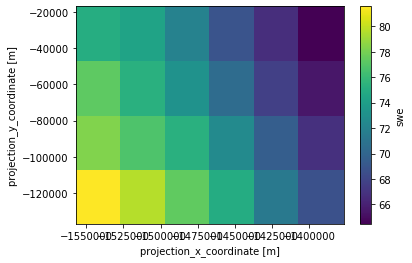

In [6]:
# Delta SWE
dswe = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0)
dswe = dswe * 1000 # Convert from m to mm water equivalent
dswe.plot()
dswe_mean = dswe.mean(dim='easting').mean(dim='northing').values

print("Mean Delta SWE (mm) = " + str(dswe_mean))

In [7]:
# Function to calculate timesum of variable
def time_sum(ds, var):
    time_sum = ds[var][dict(time=slice(1,len(ds['time'])))].sum(dim='time')
    return time_sum

# Function to calculate SMB from mass balance components
def calc_mb(ds):
    mb = time_sum(ds, 'MS_HNW') - time_sum(ds, 'ET') - time_sum(ds, 'MS_WIND') + time_sum(ds, 'MS_SNOWPACK_RUNOFF')
    return mb

Mean SMB (mm) = 72.67075
Mean ratio between Mass balance and delta SWE = 1.0000005


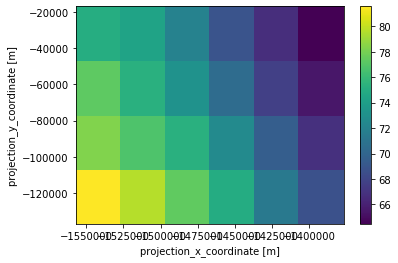

In [8]:
# Sum of mass balance components (note that only precipitation and sublimation are currently non-zero)
mb = calc_mb(ds)
mb.plot()
mb_mean = mb.mean(dim='easting').mean(dim='northing').values

print("Mean SMB (mm) = " + str(mb_mean))
print("Mean ratio between Mass balance and delta SWE = " + str(mb_mean / dswe_mean))

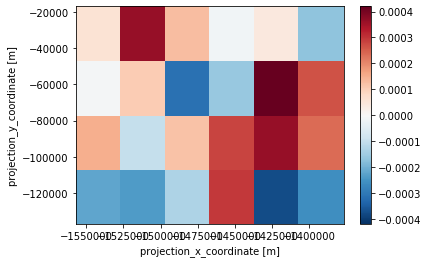

In [9]:
diff = mb - dswe
diff.plot()

# Time sum drfiting snow transport (mm)

<xarray.DataArray 'WINDEROSIONDEPOSITION' ()>
array(0., dtype=float32)


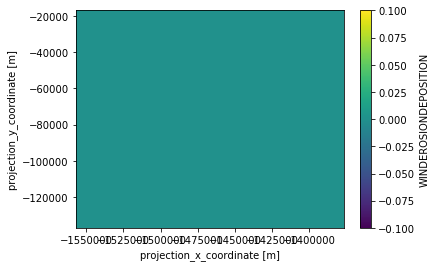

In [10]:
net_we = ds['WINDEROSIONDEPOSITION'].sum(dim='time')
net_we.plot()
print(net_we.mean())

In [11]:
net_we[1,1]

<xarray.DataArray 'WINDEROSIONDEPOSITION' ()>
array(0., dtype=float32)
Coordinates:
    northing  float32 -92000.0
    easting   float32 -1512000.0

In [12]:
net_we[0,1]

<xarray.DataArray 'WINDEROSIONDEPOSITION' ()>
array(0., dtype=float32)
Coordinates:
    northing  float32 -122000.0
    easting   float32 -1512000.0

In [13]:
net_we[1,0]

<xarray.DataArray 'WINDEROSIONDEPOSITION' ()>
array(0., dtype=float32)
Coordinates:
    northing  float32 -92000.0
    easting   float32 -1542000.0